In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [67]:
import os
os.environ['KAGGLE_USERNAME'] = "mustafidkaisalana  "
os.environ['KAGGLE_KEY'] = "1dc83f8e583c76a6b3fe101c075df0c6"

In [68]:
!kaggle datasets download -d nypd/vehicle-collisions

Dataset URL: https://www.kaggle.com/datasets/nypd/vehicle-collisions
License(s): CC0-1.0
vehicle-collisions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [69]:
import zipfile
with zipfile.ZipFile("vehicle-collisions.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [70]:
data = pd.read_csv("dataset/database.csv")

In [71]:
print(data.head())

   UNIQUE KEY        DATE  TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0     3146911  01/01/2015  0:20    QUEENS   11358.0  40.751847 -73.787862   
1     3146180  01/01/2015  0:20       NaN       NaN  40.771289 -73.946693   
2     3146384  01/01/2015  0:21  BROOKLYN   11205.0  40.689445 -73.955121   
3     3146013  01/01/2015  0:30  BROOKLYN   11213.0  40.673845 -73.925080   
4     3146120  01/01/2015  0:33       NaN       NaN        NaN        NaN   

                    LOCATION    ON STREET NAME   CROSS STREET NAME  ...  \
0   (40.7518471, -73.787862)         47 AVENUE          193 STREET  ...   
1  (40.7712888, -73.9466928)               NaN                 NaN  ...   
2  (40.6894449, -73.9551212)    BEDFORD AVENUE    LAFAYETTE AVENUE  ...   
3  (40.6738445, -73.9250801)    BUFFALO AVENUE  SAINT MARKS AVENUE  ...   
4                        NaN  RICHMOND TERRACE        SOUTH AVENUE  ...   

                VEHICLE 1 TYPE     VEHICLE 2 TYPE  VEHICLE 3 TYPE  \
0  SPORT UTILITY/

In [72]:
print(data.columns)

Index(['UNIQUE KEY', 'DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'PERSONS INJURED', 'PERSONS KILLED',
       'PEDESTRIANS INJURED', 'PEDESTRIANS KILLED', 'CYCLISTS INJURED',
       'CYCLISTS KILLED', 'MOTORISTS INJURED', 'MOTORISTS KILLED',
       'VEHICLE 1 TYPE', 'VEHICLE 2 TYPE', 'VEHICLE 3 TYPE', 'VEHICLE 4 TYPE',
       'VEHICLE 5 TYPE', 'VEHICLE 1 FACTOR', 'VEHICLE 2 FACTOR',
       'VEHICLE 3 FACTOR', 'VEHICLE 4 FACTOR', 'VEHICLE 5 FACTOR'],
      dtype='object')


In [73]:
X = data.drop('PERSONS INJURED', axis=1)
y = data['PERSONS INJURED']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (382185, 28)
Shape of y_train: (382185,)


In [76]:

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477732 entries, 0 to 477731
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   UNIQUE KEY           477732 non-null  int64  
 1   DATE                 477732 non-null  object 
 2   TIME                 477732 non-null  object 
 3   BOROUGH              338390 non-null  object 
 4   ZIP CODE             338329 non-null  float64
 5   LATITUDE             356600 non-null  float64
 6   LONGITUDE            356600 non-null  float64
 7   LOCATION             356600 non-null  object 
 8   ON STREET NAME       364552 non-null  object 
 9   CROSS STREET NAME    335574 non-null  object 
 10  OFF STREET NAME      58511 non-null   object 
 11  PERSONS INJURED      477732 non-null  int64  
 12  PERSONS KILLED       477732 non-null  int64  
 13  PEDESTRIANS INJURED  477732 non-null  int64  
 14  PEDESTRIANS KILLED   477732 non-null  int64  
 15  CYCLISTS INJURED 

In [77]:
numerical_columns = ['PERSONS KILLED', 'PEDESTRIANS INJURED', 'PEDESTRIANS KILLED', 
                     'CYCLISTS INJURED', 'CYCLISTS KILLED', 'MOTORISTS INJURED', 'MOTORISTS KILLED']
X = data[numerical_columns]
y = data['PERSONS INJURED']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns

X_train_numeric = X_train.drop(non_numeric_columns, axis=1)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
# Select only numeric columns from X_test
X_test_numeric = X_test.select_dtypes(include=['number'])

# Make predictions using the trained model
y_pred = model.predict(X_test_numeric)

In [87]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Akurasi Model:", accuracy_percentage)
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred, zero_division=1))

Akurasi Model: 98.62371398369389
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     78035
           1       0.99      0.94      0.96     13506
           2       0.76      0.84      0.80      2554
           3       0.84      0.96      0.90       868
           4       0.60      0.95      0.73       338
           5       0.86      0.96      0.91       133
           6       0.20      0.05      0.08        58
           7       0.80      0.91      0.85        22
           8       0.00      0.00      0.00         8
           9       1.00      0.00      0.00         9
          10       1.00      0.00      0.00         5
          11       0.20      1.00      0.33         1
          12       1.00      0.00      0.00         4
          13       1.00      0.00      0.00         1
          16       1.00      0.00      0.00         2
          18       1.00      0.00      0.00         1
          22       1.00   

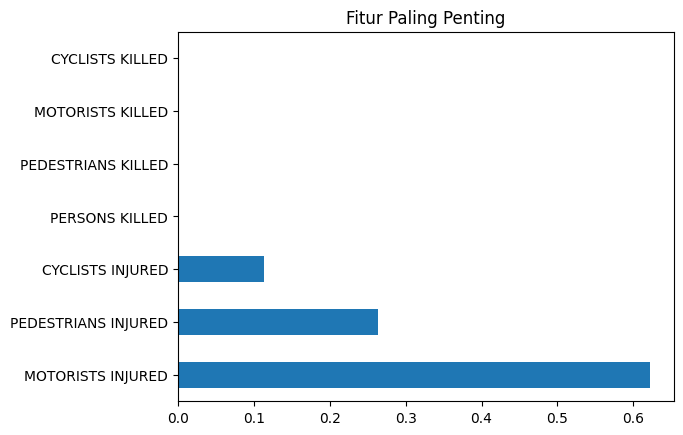

In [88]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Fitur Paling Penting')
plt.show()

### FITUR YANG PALING PENTING GADALAH MOTORIST INJURED

In [89]:
vehicle_factors = data['VEHICLE 1 FACTOR'].value_counts().head(10)  # Ambil 10 faktor penyebab kecelakaan teratas
print("Faktor Penyebab Kecelakaan:")
print(vehicle_factors)

Faktor Penyebab Kecelakaan:
VEHICLE 1 FACTOR
UNSPECIFIED                       235726
DRIVER INATTENTION/DISTRACTION     69474
FAILURE TO YIELD RIGHT-OF-WAY      21852
FATIGUED/DROWSY                    20830
OTHER VEHICULAR                    15745
BACKING UNSAFELY                   14502
TURNING IMPROPERLY                 11430
FOLLOWING TOO CLOSELY              10049
LOST CONSCIOUSNESS                  8764
PRESCRIPTION MEDICATION             6192
Name: count, dtype: int64


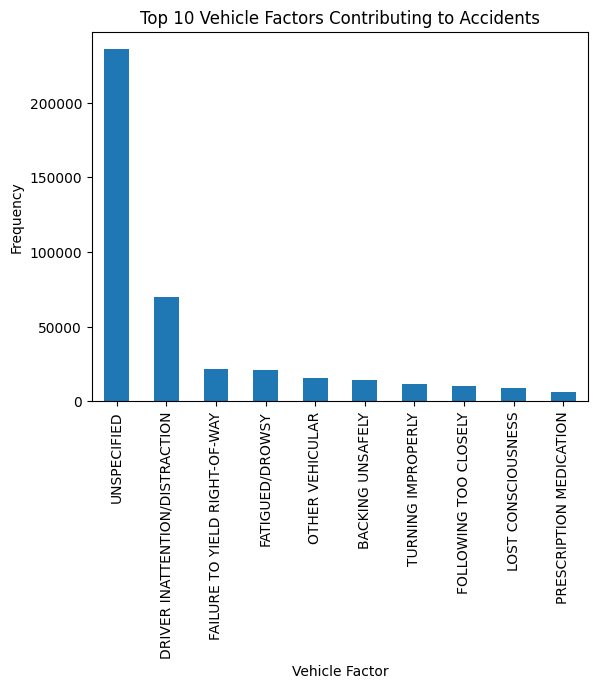

In [90]:
vehicle_factors.plot(kind='bar', title='Top 10 Vehicle Factors Contributing to Accidents')
plt.xlabel('Vehicle Factor')
plt.ylabel('Frequency')
plt.show()